## 📓 Notebook Manager

This cell initializes the widgets required for managing your research notebook. Please run the cell below to enable functionality for:
- Exporting cells tagged with `export` into a `clean` notebook
- Generating a dynamic Table of Contents (TOC)
- Exporting the notebook to GitHub-compatible Markdown

➡️ **Be sure to execute the next cell before continuing with any editing or exporting.**

In [ ]:
# Cell 1 - Workflow Tools
import sys
sys.path.insert(0, '../../../../lib')
sys.path.insert(0, '../../../../scripts') 

from notebook_tools import TOCWidget, ExportWidget
import ipywidgets as widgets


# Create widget instances
toc = TOCWidget()
export = ExportWidget()

# Create horizontal layout
left_side = widgets.VBox([toc.button, export.button, toc.status])
right_side = widgets.VBox([toc.output, export.output])

# Display side by side
display(widgets.HBox([left_side, right_side]))

# 🚦 Traffic Video Preprocessing - Methodology [VERSION]

## 🎯 Purpose
This notebook implements the data preprocessing workflow for GDOT traffic camera videos. We process raw video files into frame sequences suitable for computer vision tasks.

## 📋 Context
- **Data Source**: 30 GDOT traffic camera feeds (recorded locally)
- **Video Specs**: 480 resolution, 15 fps
- **Methodology Goal**: Establish reproducible preprocessing workflow with clear documentation

## 🔄 Workflow Overview
1. Video ingestion and cataloging
2. Frame extraction
3. Quality control
4. Spatial transformations
5. Color normalization
6. Temporal downsampling
7. Data organization
8. Export and storage

## ⚡ Key Improvements (Methodology [VERSION])
- Added reproducibility checkpoints
- Streamlined workflow touchpoints
- Enhanced error handling and logging

## 📚 Notebook Structure
- **Setup**: Environment and dependencies
- **Processing**: Step-by-step video preprocessing
- **Validation**: Quality checks and verification
- **Summary**: Results and analysis (see end of notebook)

*Processing completed: [DATE] | Methodology version: [VERSION]*

**Last Updated**: [DATE]  
**Author**: [NAME]  
**Version**: [VERSION]

## 📑 Table of Contents (Auto-Generated)

This section will automatically generate a table of contents for your research notebook once you run the **Generate TOC** function. The table of contents will help you navigate through your data collection, analysis, and findings as your citizen science project develops.

➡️ **Do not edit this cell manually. It will be overwritten automatically.**


<!-- TOC -->
# Table of Contents

- [📓 Notebook Manager](#📓-notebook-manager)
- [🎯 Purpose](#🎯-purpose)
- [📋 Context](#📋-context)
- [🔄 Workflow Overview](#🔄-workflow-overview)
- [⚡ Key Improvements (Methodology [VERSION])](#⚡-key-improvements-(methodology-[version]))
- [📚 Notebook Structure](#📚-notebook-structure)
- [📑 Table of Contents (Auto-Generated)](#📑-table-of-contents-(auto-generated))
- [🔧 Environment Setup](#🔧-environment-setup)
  - [📐 Preprocessing Configuration Parameters](#📐-preprocessing-configuration-parameters)
    - [Target Parameters](#target-parameters)
    - [Path Configuration](#path-configuration)
    - [Processing Settings](#processing-settings)
    - [Quality Thresholds](#quality-thresholds)
    - [Video Settings](#video-settings)
  - [Environment Initialization](#environment-initialization)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [🔄 Progress Tracking & Checkpoint System](#🔄-progress-tracking-&-checkpoint-system)
- [💾 Initialize Checkpoint and Progress Tracking Functions](#💾-initialize-checkpoint-and-progress-tracking-functions)
  - [📊 Analysis & ObservationS](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [📹 Video Ingestion & Cataloging](#📹-video-ingestion-&-cataloging)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [🎞️ Frame Extraction](#🎞️-frame-extraction)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [🔍 Image Quality Control](#🔍-image-quality-control)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [📐 Spatial Transformations](#📐-spatial-transformations)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [🎨 Color Space Normalization](#🎨-color-space-normalization)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [⏱️ Temporal Downsampling](#⏱️-temporal-downsampling)
  - [⚠️ Conditional Motion Detection](#⚠️-conditional-motion-detection)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)
- [💾 Export & Storage](#💾-export-&-storage)
  - [📊 Analysis & Observations](#📊-analysis-&-observations)
    - [Results](#results)
    - [Observations](#observations)
    - [Notes](#notes)

<!-- /TOC -->



## 🔧 Environment Setup

This cell establishes the preprocessing environment by:

1. **Import Required Libraries**
   - OpenCV (cv2) for video processing and frame extraction
   - NumPy for array operations and numerical computations
   - Pandas for data organization and metadata management
   - Logging for process tracking and error reporting
   - System utilities for path handling and file operations

2. **Library Verification**
   - Check OpenCV installation and version
   - Verify NumPy and Pandas availability
   - Display version information for debugging

3. **Initialize Helper Functions**
   - **calculate_brightness()**: Compute average pixel intensity (0-255)
   - **calculate_blur_score()**: Measure sharpness using Laplacian variance
   - **get_video_metadata()**: Extract video properties (fps, resolution, duration)

4. **Directory Setup**
   - Create output directory structure
   - Ensure path exists before processing begins

5. **Codec Validation**
   - Test preferred video codec availability
   - Confirm fourcc code generation

**Note**: This cell must run successfully before proceeding with video processing. Any import errors or missing dependencies will be reported here.

### 📐 Preprocessing Configuration Parameters

This cell defines all parameters for individual video preprocessing. Parameters are organized into categories with emoji indicators:

#### Target Parameters
- 🎯 **VIDEO_ID**: Specific camera to process (e.g., ATL-1005)
- 🎯 **BATCH_DATE**: Date from batch analysis (YYYYMMDD format)

#### Path Configuration  
- 📁 **INPUT_BASE**: Root directory for video recordings
- 📁 **OUTPUT_BASE**: Root directory for processed output
- 📁 **VIDEO_DIR**: Derived path to specific camera/date videos
- 📁 **OUTPUT_DIR**: Derived path for this preprocessing run

#### Processing Settings
- 📊 **FRAMES_TO_EXTRACT**: Total number of frames to extract
- 📊 **SAMPLE_RATE**: Extract every Nth frame from video

#### Quality Thresholds
Values from batch analysis quality metrics:
- 🔍 **brightness_min**: Minimum acceptable brightness (0-255)
- 🔍 **brightness_max**: Maximum acceptable brightness (0-255)  
- 🔍 **blur_min**: Minimum blur score (Laplacian variance)

#### Video Settings
- 🎥 **PREFERRED_CODEC**: Primary video codec for processing
- 🎥 **FALLBACK_CODECS**: Alternative codecs if primary fails
- 🎥 **MAX_FRAME_WIDTH**: Maximum frame width for resizing
- 🎥 **MAX_FRAME_HEIGHT**: Maximum frame height for resizing
- 🎥 **JPEG_QUALITY**: Output quality for saved frames (0-100)

**Note**: These values are hardcoded for initial testing. Future versions will read from `preprocessing_config.json`.

In [1]:
# preprocessing configuration parameters
from pathlib import Path

CONFIG = {
    # target parameters
    'VIDEO_ID': 'ATL-0972',  # 🎯 camera to process
    'BATCH_DATE': '20250620',  # 🎯 date from batch analysis
    'TARGET_HOUR': 12,  # 🎯 target hour (noon)
    
    # path configuration  
    'INPUT_BASE': Path.home() / 'traffic-recordings',  # 📁 video source
    'OUTPUT_BASE': Path('../../../../data/preprocessing/individual_analysis'),    
    # processing settings
    'FRAMES_TO_EXTRACT': 300,  # 📊 total frames to extract
    'SAMPLE_RATE': 15,  # 📊 extract every Nth frame
    
    # quality thresholds (from batch analysis)
    'QUALITY_THRESHOLD': {
        'brightness_min': 104.47,  # 🔍 minimum brightness
        'brightness_max': 114.75,  # 🔍 maximum brightness  
        'blur_min': 3494.35  # 🔍 minimum blur score
    },
    
    # video settings
    'PREFERRED_CODEC': 'mp4v',  # 🎥 primary codec
    'FALLBACK_CODECS': ['h264', 'xvid'],  # 🎥 alternatives
    'MAX_FRAME_WIDTH': 1920,  # 🎥 max width
    'MAX_FRAME_HEIGHT': 1080,  # 🎥 max height
    'JPEG_QUALITY': 95  # 🎥 output quality (0-100)
}

# derived paths
date_formatted = f"{CONFIG['BATCH_DATE'][:4]}-{CONFIG['BATCH_DATE'][4:6]}-{CONFIG['BATCH_DATE'][6:8]}"
CONFIG['OUTPUT_DIR'] = CONFIG['OUTPUT_BASE'] / date_formatted / CONFIG['VIDEO_ID']
CONFIG['VIDEO_DIR'] = CONFIG['INPUT_BASE'] / CONFIG['VIDEO_ID'] / date_formatted

print("Configuration loaded:")
print(f"  Processing: {CONFIG['VIDEO_ID']} from {date_formatted}")
print(f"  Output to: {CONFIG['OUTPUT_DIR']}")

Configuration loaded:
  Processing: ATL-0972 from 2025-06-20
  Output to: ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972


### Environment Initialization

The preprocessing configuration parameters defined above will now be used to initialize the environment, import required libraries, and set up helper functions for video processing.

In [2]:
# environment setup
import cv2
import numpy as np
import pandas as pd
import os
import sys
import json
import logging
from datetime import datetime, timedelta

# setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# verify opencv
try:
    print(f"✓ OpenCV version: {cv2.__version__}")
except ImportError:
    print("⚠️ OpenCV not installed. Install with: pip install opencv-python")
    
print(f"✓ Python version: {sys.version.split()[0]}")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Pandas version: {pd.__version__}")

# helper functions
def calculate_brightness(frame):
    """Calculate average brightness of frame"""
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return np.mean(gray)

def calculate_blur_score(frame):
    """Calculate Laplacian variance (higher = sharper)"""
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def get_video_metadata(video_path):
    """Extract video metadata"""
    metadata = {}
    cap = cv2.VideoCapture(str(video_path))
    if cap.isOpened():
        metadata['fps'] = cap.get(cv2.CAP_PROP_FPS)
        metadata['frame_count'] = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        metadata['width'] = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        metadata['height'] = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        metadata['duration_seconds'] = metadata['frame_count'] / metadata['fps'] if metadata['fps'] > 0 else 0
        metadata['codec'] = int(cap.get(cv2.CAP_PROP_FOURCC))
        cap.release()
    return metadata

# create output directory
CONFIG['OUTPUT_DIR'].mkdir(parents=True, exist_ok=True)

# verify codec support
fourcc_test = cv2.VideoWriter_fourcc(*CONFIG['PREFERRED_CODEC'])
print(f"✓ Preferred codec '{CONFIG['PREFERRED_CODEC']}' fourcc: {fourcc_test}")

print(f"\n✓ Environment setup complete")
print(f"  Output directory created: {CONFIG['OUTPUT_DIR']}")

✓ OpenCV version: 4.11.0
✓ Python version: 3.12.9
✓ NumPy version: 2.2.4
✓ Pandas version: 2.2.3
✓ Preferred codec 'mp4v' fourcc: 1983148141

✓ Environment setup complete
  Output directory created: ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972


### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Environment Setup*

---

## 🔄 Progress Tracking & Checkpoint System

The following cells implement simple progress tracking and checkpoint functionality to:

1. **Track Processing Progress**
   - Monitor which video is currently being processed
   - Count successful vs failed videos
   - Display elapsed time

2. **Enable Restart Capability**
   - Save progress after each video completes
   - Automatically skip already-processed videos on rerun
   - Maintain list of failed videos for retry

This ensures we don't lose work if the kernel crashes and provides visibility into long-running processes.

## 💾 Initialize Checkpoint and Progress Tracking Functions

This module establishes checkpoint and progress tracking capabilities for the preprocessing workflow. The system creates functions for saving and loading processing state, initializes timing and counting variables, recovers from any existing checkpoints, and provides real-time progress monitoring with completion status.

**Implemented below.**

In [3]:
import json
import os
import time
from datetime import datetime

# Initialize tracking variables
CHECKPOINT_FILE = "preprocessing_checkpoint.json"
start_time = time.time()

def load_checkpoint():
    """Load previous progress if it exists"""
    if os.path.exists(CHECKPOINT_FILE):
        with open(CHECKPOINT_FILE, 'r') as f:
            checkpoint = json.load(f)
            print(f"✓ Loaded checkpoint: {len(checkpoint['processed'])} videos already processed")
            return checkpoint
    return {
        "processed": [], 
        "failed": [], 
        "last_completed": None, 
        "start_time": datetime.now().isoformat()
    }

def save_checkpoint(checkpoint):
    """Save current progress"""
    checkpoint['last_updated'] = datetime.now().isoformat()
    with open(CHECKPOINT_FILE, 'w') as f:
        json.dump(checkpoint, f, indent=2)

def log_progress(video_name, status, checkpoint, total_videos):
    """Log progress and update checkpoint"""
    if status == "success":
        checkpoint['processed'].append(video_name)
    else:
        checkpoint['failed'].append(video_name)
    
    checkpoint['last_completed'] = video_name
    save_checkpoint(checkpoint)
    
    # Display progress
    elapsed = time.time() - start_time
    processed_count = len(checkpoint['processed'])
    failed_count = len(checkpoint['failed'])
    
    print(f"\n[{datetime.now().strftime('%H:%M:%S')}] {video_name}: {status}")
    print(f"Progress: {processed_count}/{total_videos} | Failed: {failed_count} | Elapsed: {elapsed/60:.1f}min")

# Load any existing checkpoint
checkpoint = load_checkpoint()
print(f"Ready to process videos. Checkpoint system initialized.")

Ready to process videos. Checkpoint system initialized.


### 📊 Analysis & ObservationS

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*Initialize Checkpoint and Progress Tracking Functions*

---

## 📹 Video Ingestion & Cataloging

This module loads video files from the source directory and extracts technical metadata including resolution, frame rate, duration, and codec specifications. The cataloging process builds a comprehensive data inventory and identifies format variations that may impact downstream processing stages.

*The following code cell implements the video ingestion module using FFmpeg and OpenCV for metadata extraction.*

In [4]:
# video ingestion and cataloging
def parse_timestamp(filename):
    """extract timestamp from filename"""
    parts = filename.stem.split('_')
    if len(parts) >= 3:
        time_str = parts[2]
        hours = int(time_str[:2])
        minutes = int(time_str[2:4])
        return hours * 60 + minutes  # minutes from midnight
    return None

# find videos
video_files = list(CONFIG['VIDEO_DIR'].glob(f"{CONFIG['VIDEO_ID']}_*.mp4"))

if not video_files:
    raise FileNotFoundError(f"No videos found for {CONFIG['VIDEO_ID']} on {CONFIG['BATCH_DATE']}")

# find closest to noon
target_minutes = CONFIG['TARGET_HOUR'] * 60  # 720 minutes
closest_video = None
min_diff = float('inf')

for video in video_files:
    minutes = parse_timestamp(video)
    if minutes is not None:
        diff = abs(minutes - target_minutes)
        if diff < min_diff:
            min_diff = diff
            closest_video = video

CONFIG['selected_video'] = closest_video
time_str = closest_video.stem.split('_')[2]
print(f"Selected: {closest_video.name}")
print(f"  Starts at: {time_str[:2]}:{time_str[2:4]}:{time_str[4:6]}")

Selected: ATL-0972_20250620_120641.mp4
  Starts at: 12:06:41


### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Video Ingestion & Cataloging*

---

## 🎞️ Frame Extraction

This module samples frames from video sequences at specified temporal intervals. The extraction process converts temporal video data into spatial image representations suitable for computer vision processing and analysis.

*The following code cell implements frame extraction using OpenCV with configurable sampling rates and output formats.*



In [5]:
# frame extraction
import cv2

print(f"Frame Extraction")
print(f"Extracting {CONFIG['FRAMES_TO_EXTRACT']} frames (every {CONFIG['SAMPLE_RATE']} frames)")

video_path = CONFIG['selected_video']
cap = cv2.VideoCapture(str(video_path))

if not cap.isOpened():
    raise ValueError(f"Cannot open video: {video_path}")

# create frames directory
frames_dir = CONFIG['OUTPUT_DIR'] / 'frames'
frames_dir.mkdir(exist_ok=True)

# extract frames
frames_extracted = 0
frame_index = 0

while frames_extracted < CONFIG['FRAMES_TO_EXTRACT'] and cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # extract every Nth frame
    if frame_index % CONFIG['SAMPLE_RATE'] == 0:
        frame_filename = f"frame_{frames_extracted:04d}.jpg"
        frame_path = frames_dir / frame_filename
        
        # save frame
        cv2.imwrite(str(frame_path), frame, [cv2.IMWRITE_JPEG_QUALITY, CONFIG['JPEG_QUALITY']])
        
        frames_extracted += 1
        if frames_extracted % 50 == 0:
            print(f"  Extracted {frames_extracted}/{CONFIG['FRAMES_TO_EXTRACT']} frames")
    
    frame_index += 1

cap.release()

CONFIG['frames_dir'] = frames_dir
CONFIG['frames_extracted'] = frames_extracted

print(f"\n✓ Extracted {frames_extracted} frames to {frames_dir}")

Frame Extraction
Extracting 300 frames (every 15 frames)
  Extracted 50/300 frames
  Extracted 100/300 frames
  Extracted 150/300 frames
  Extracted 200/300 frames
  Extracted 250/300 frames
  Extracted 300/300 frames

✓ Extracted 300 frames to ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972/frames


### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Frame Extraction*

---

## 🔍 Image Quality Control


This module filters out blurry, dark, or corrupted frames using automated quality metrics. The quality control process ensures only processable frames continue through the workflow, optimizing compute resources and improving downstream analysis reliability.


*The following code cell implements quality filtering using Laplacian variance for blur detection, histogram analysis for exposure assessment, and file integrity checks.*

Image Quality Control
Checking quality of 300 frames

Quality Metrics Explained:
- Brightness: Average pixel intensity (0-255)
  Calculated as: mean(grayscale_image)
- Blur Score: Laplacian variance (higher = sharper)
  Calculated as: variance(Laplacian(grayscale_image))

Thresholds from batch analysis:
- Brightness must be: 104.5 - 114.8
- Blur score must be: ≥ 3494.3


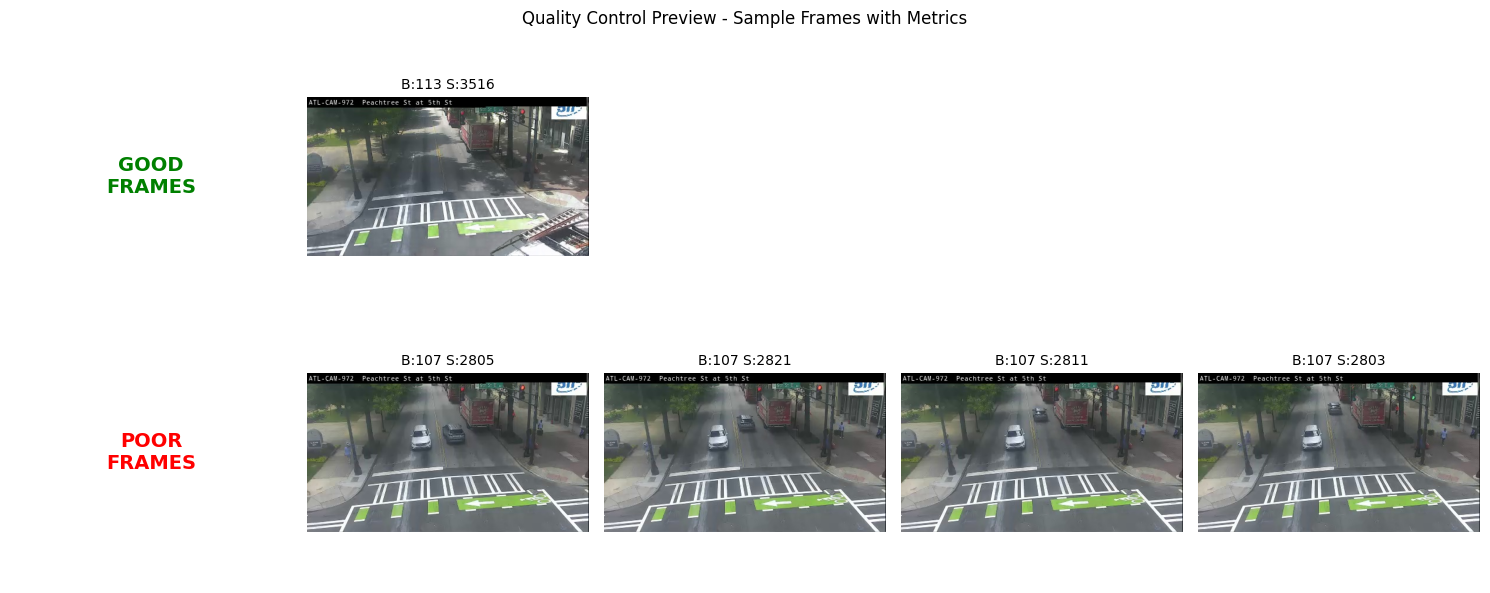


Results:
  Good frames: 1 (meet all thresholds)
  Poor frames: 299 (fail one or more thresholds)
  Pass rate: 0.3%

Failure reasons (first 5):
  frame_0000.jpg: too blurry (2805)
  frame_0001.jpg: too blurry (2821)
  frame_0002.jpg: too blurry (2811)
  frame_0003.jpg: too blurry (2803)
  frame_0004.jpg: too blurry (2817)


In [6]:
# image quality control
import matplotlib.pyplot as plt

print("Image Quality Control")
print("=" * 60)

# get all extracted frames
frame_files = sorted(CONFIG['frames_dir'].glob("frame_*.jpg"))
print(f"Checking quality of {len(frame_files)} frames")

print("\nQuality Metrics Explained:")
print("- Brightness: Average pixel intensity (0-255)")
print("  Calculated as: mean(grayscale_image)")
print("- Blur Score: Laplacian variance (higher = sharper)")
print("  Calculated as: variance(Laplacian(grayscale_image))")

print(f"\nThresholds from batch analysis:")
print(f"- Brightness must be: {CONFIG['QUALITY_THRESHOLD']['brightness_min']:.1f} - {CONFIG['QUALITY_THRESHOLD']['brightness_max']:.1f}")
print(f"- Blur score must be: ≥ {CONFIG['QUALITY_THRESHOLD']['blur_min']:.1f}")

quality_results = []
good_frames = []
poor_frames = []

for frame_path in frame_files:
    # read frame
    frame = cv2.imread(str(frame_path))
    if frame is None:
        poor_frames.append(frame_path)
        continue
    
    # calculate metrics
    brightness = calculate_brightness(frame)
    blur_score = calculate_blur_score(frame)
    
    # check thresholds
    passes_quality = (
        brightness >= CONFIG['QUALITY_THRESHOLD']['brightness_min'] and
        brightness <= CONFIG['QUALITY_THRESHOLD']['brightness_max'] and
        blur_score >= CONFIG['QUALITY_THRESHOLD']['blur_min']
    )
    
    result = {
        'frame': frame_path.name,
        'brightness': brightness,
        'blur_score': blur_score,
        'passes': passes_quality
    }
    quality_results.append(result)
    
    if passes_quality:
        good_frames.append(frame_path)
    else:
        poor_frames.append(frame_path)

# save quality report
quality_df = pd.DataFrame(quality_results)
quality_df.to_csv(CONFIG['OUTPUT_DIR'] / 'quality_report.csv', index=False)

# visualize samples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Quality Control Preview - Sample Frames with Metrics')

# show good frames
axes[0, 0].text(0.5, 0.5, 'GOOD\nFRAMES', ha='center', va='center', fontsize=14, weight='bold', color='green')
axes[0, 0].axis('off')

for i in range(4):
    if i < len(good_frames):
        img = cv2.imread(str(good_frames[i]))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        idx = quality_df[quality_df['frame'] == good_frames[i].name].index[0]
        
        axes[0, i+1].imshow(img_rgb)
        axes[0, i+1].set_title(f"B:{quality_df.loc[idx, 'brightness']:.0f} S:{quality_df.loc[idx, 'blur_score']:.0f}", fontsize=10)
        axes[0, i+1].axis('off')
    else:
        axes[0, i+1].axis('off')

# show poor frames
axes[1, 0].text(0.5, 0.5, 'POOR\nFRAMES', ha='center', va='center', fontsize=14, weight='bold', color='red')
axes[1, 0].axis('off')

for i in range(4):
    if i < len(poor_frames):
        img = cv2.imread(str(poor_frames[i]))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        idx = quality_df[quality_df['frame'] == poor_frames[i].name].index[0]
        
        axes[1, i+1].imshow(img_rgb)
        axes[1, i+1].set_title(f"B:{quality_df.loc[idx, 'brightness']:.0f} S:{quality_df.loc[idx, 'blur_score']:.0f}", fontsize=10)
        axes[1, i+1].axis('off')
    else:
        axes[1, i+1].axis('off')

plt.tight_layout()
plt.show()

CONFIG['good_frames'] = good_frames
CONFIG['quality_results'] = quality_df

print(f"\nResults:")
print(f"  Good frames: {len(good_frames)} (meet all thresholds)")
print(f"  Poor frames: {len(poor_frames)} (fail one or more thresholds)")
print(f"  Pass rate: {len(good_frames)/len(frame_files)*100:.1f}%")

# show why frames failed
if poor_frames:
    print("\nFailure reasons (first 5):")
    for i, frame in enumerate(poor_frames[:5]):
        idx = quality_df[quality_df['frame'] == frame.name].index[0]
        b = quality_df.loc[idx, 'brightness']
        s = quality_df.loc[idx, 'blur_score']
        reasons = []
        if b < CONFIG['QUALITY_THRESHOLD']['brightness_min']:
            reasons.append(f"too dark ({b:.0f})")
        elif b > CONFIG['QUALITY_THRESHOLD']['brightness_max']:
            reasons.append(f"too bright ({b:.0f})")
        if s < CONFIG['QUALITY_THRESHOLD']['blur_min']:
            reasons.append(f"too blurry ({s:.0f})")
        print(f"  {frame.name}: {', '.join(reasons)}")

### 📊 Analysis & Observations
**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Image Quality Control*

---

## 📐 Spatial Transformations

This module applies geometric transformations to frames from the selected video. The transformations ensure consistent dimensions for downstream processing while maintaining aspect ratio.

*The following code cell implements spatial transformations for frames from the single video being processed.*

In [7]:
# spatial transformations
print("Spatial Transformations")

# only process good frames
frames_to_transform = CONFIG['good_frames']
print(f"Transforming {len(frames_to_transform)} frames from video: {CONFIG['selected_video'].name}")

# create transformed directory
transformed_dir = CONFIG['OUTPUT_DIR'] / 'transformed'
transformed_dir.mkdir(exist_ok=True)

# target dimensions
target_width = CONFIG['MAX_FRAME_WIDTH']
target_height = CONFIG['MAX_FRAME_HEIGHT']

transformed_frames = []

for frame_path in frames_to_transform:
    # read frame
    frame = cv2.imread(str(frame_path))
    height, width = frame.shape[:2]
    
    # resize if needed
    if width > target_width or height > target_height:
        scale = min(target_width/width, target_height/height)
        new_width = int(width * scale)
        new_height = int(height * scale)
        frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    # save transformed frame
    output_path = transformed_dir / frame_path.name
    cv2.imwrite(str(output_path), frame, [cv2.IMWRITE_JPEG_QUALITY, CONFIG['JPEG_QUALITY']])
    transformed_frames.append(output_path)

CONFIG['transformed_frames'] = transformed_frames
print(f"\n✓ Completed spatial transformations for {CONFIG['VIDEO_ID']}")

Spatial Transformations
Transforming 1 frames from video: ATL-0972_20250620_120641.mp4

✓ Completed spatial transformations for ATL-0972


Spatial Transformations
Processing 1 frames from: ATL-0972_20250620_120641.mp4

What Spatial Transformations do:
- Check frame dimensions against max allowed size
- Resize if needed while maintaining aspect ratio
- Apply consistent output format and quality
- In this case: 480p videos are below max dimensions, so no resize needed

Frame dimensions: 480x270
Target max: 1920x1080
Action: No resize needed (within limits)


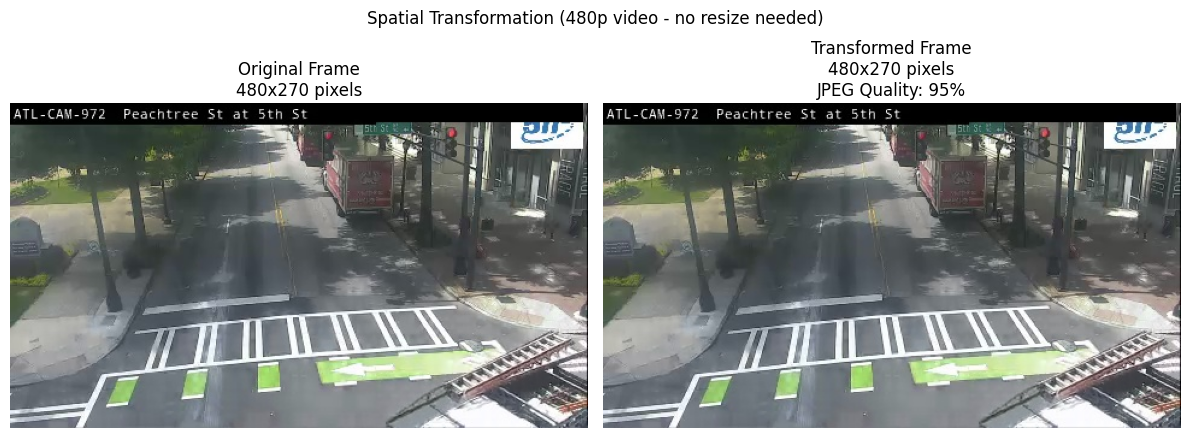


✓ Transformation complete
  Frames processed: 1
  Output location: ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972/transformed


In [8]:
# spatial transformations
import matplotlib.pyplot as plt

print("Spatial Transformations")
print("=" * 60)

frames_to_transform = CONFIG['good_frames']
print(f"Processing {len(frames_to_transform)} frames from: {CONFIG['selected_video'].name}")

print("\nWhat Spatial Transformations do:")
print("- Check frame dimensions against max allowed size")
print("- Resize if needed while maintaining aspect ratio")
print("- Apply consistent output format and quality")
print("- In this case: 480p videos are below max dimensions, so no resize needed")

# create transformed directory
transformed_dir = CONFIG['OUTPUT_DIR'] / 'transformed'
transformed_dir.mkdir(exist_ok=True)

transformed_frames = []

# process frames
for i, frame_path in enumerate(frames_to_transform):
    frame = cv2.imread(str(frame_path))
    height, width = frame.shape[:2]
    
    # save frame (no resize needed for 480p)
    output_path = transformed_dir / frame_path.name
    cv2.imwrite(str(output_path), frame, [cv2.IMWRITE_JPEG_QUALITY, CONFIG['JPEG_QUALITY']])
    transformed_frames.append(output_path)
    
    # show first frame details
    if i == 0:
        print(f"\nFrame dimensions: {width}x{height}")
        print(f"Target max: {CONFIG['MAX_FRAME_WIDTH']}x{CONFIG['MAX_FRAME_HEIGHT']}")
        print(f"Action: No resize needed (within limits)")

# visualize before/after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# show sample frame
sample_idx = min(5, len(frames_to_transform)-1)
orig = cv2.imread(str(frames_to_transform[sample_idx]))
trans = cv2.imread(str(transformed_frames[sample_idx]))

ax1.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
ax1.set_title(f"Original Frame\n{orig.shape[1]}x{orig.shape[0]} pixels")
ax1.axis('off')

ax2.imshow(cv2.cvtColor(trans, cv2.COLOR_BGR2RGB))
ax2.set_title(f"Transformed Frame\n{trans.shape[1]}x{trans.shape[0]} pixels\nJPEG Quality: {CONFIG['JPEG_QUALITY']}%")
ax2.axis('off')

plt.suptitle('Spatial Transformation (480p video - no resize needed)')
plt.tight_layout()
plt.show()

CONFIG['transformed_frames'] = transformed_frames

print(f"\n✓ Transformation complete")
print(f"  Frames processed: {len(transformed_frames)}")
print(f"  Output location: {transformed_dir}")

### 📊 Analysis & Observations
**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Spatial Transformations*

---

## 🎨 Color Space Normalization

This module normalizes color representation across frames from the processed video. The normalization ensures consistent color space handling between OpenCV (BGR) and display/ML frameworks (RGB).

*The following code cell implements color space conversion and normalization for frames from the single video being processed.*

Color Space Normalization
Normalizing 1 frames

Technical Details:
- OpenCV uses BGR (Blue-Green-Red) channel order by default
- This is legacy from early Windows bitmap format
- Most display systems and ML frameworks expect RGB order
- BGR: pixel[0]=Blue, pixel[1]=Green, pixel[2]=Red
- RGB: pixel[0]=Red, pixel[1]=Green, pixel[2]=Blue

Why this matters:
- Displaying BGR image as RGB swaps red and blue channels
- Traffic lights would appear blue instead of red!
- ML models trained on RGB data would see wrong colors

First frame shape: (270, 480, 3)
Data type: uint8
Value range: 0-255 (8-bit per channel)


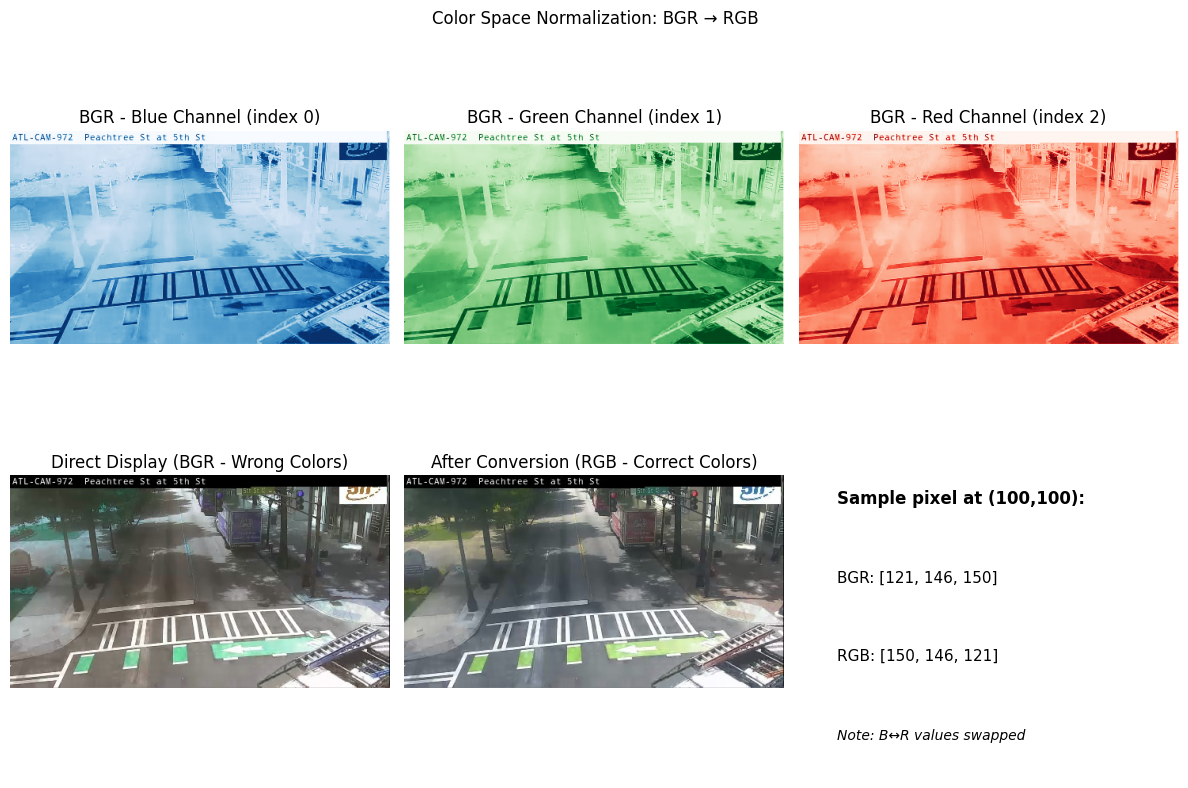


Conversion formula:
  RGB[0] = BGR[2]  (Red ← Blue position)
  RGB[1] = BGR[1]  (Green stays same)
  RGB[2] = BGR[0]  (Blue ← Red position)

✓ Color normalization complete
  Frames processed: 1
  Output: ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972/normalized


In [9]:
# color space normalization
import matplotlib.pyplot as plt
import numpy as np

print("Color Space Normalization")
print("=" * 60)

frames_to_normalize = CONFIG['transformed_frames']
print(f"Normalizing {len(frames_to_normalize)} frames")

print("\nTechnical Details:")
print("- OpenCV uses BGR (Blue-Green-Red) channel order by default")
print("- This is legacy from early Windows bitmap format")
print("- Most display systems and ML frameworks expect RGB order")
print("- BGR: pixel[0]=Blue, pixel[1]=Green, pixel[2]=Red")
print("- RGB: pixel[0]=Red, pixel[1]=Green, pixel[2]=Blue")

print("\nWhy this matters:")
print("- Displaying BGR image as RGB swaps red and blue channels")
print("- Traffic lights would appear blue instead of red!")
print("- ML models trained on RGB data would see wrong colors")

# create normalized directory
normalized_dir = CONFIG['OUTPUT_DIR'] / 'normalized'
normalized_dir.mkdir(exist_ok=True)

normalized_frames = []

for i, frame_path in enumerate(frames_to_normalize):
    # read frame (BGR)
    frame_bgr = cv2.imread(str(frame_path))
    
    # convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    
    # save as RGB (PIL expects RGB)
    output_path = normalized_dir / frame_path.name
    # convert back to BGR for cv2.imwrite
    cv2.imwrite(str(output_path), cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR), 
                [cv2.IMWRITE_JPEG_QUALITY, CONFIG['JPEG_QUALITY']])
    normalized_frames.append(output_path)
    
    if i == 0:
        print(f"\nFirst frame shape: {frame_bgr.shape}")
        print(f"Data type: {frame_bgr.dtype}")
        print(f"Value range: 0-255 (8-bit per channel)")

# show color space difference
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sample = cv2.imread(str(frames_to_normalize[0]))

# BGR channels
axes[0, 0].imshow(sample[:,:,0], cmap='Blues')
axes[0, 0].set_title('BGR - Blue Channel (index 0)')
axes[0, 0].axis('off')

axes[0, 1].imshow(sample[:,:,1], cmap='Greens')
axes[0, 1].set_title('BGR - Green Channel (index 1)')
axes[0, 1].axis('off')

axes[0, 2].imshow(sample[:,:,2], cmap='Reds')
axes[0, 2].set_title('BGR - Red Channel (index 2)')
axes[0, 2].axis('off')

# RGB display
sample_rgb = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

axes[1, 0].imshow(sample)
axes[1, 0].set_title('Direct Display (BGR - Wrong Colors)')
axes[1, 0].axis('off')

axes[1, 1].imshow(sample_rgb)
axes[1, 1].set_title('After Conversion (RGB - Correct Colors)')
axes[1, 1].axis('off')

# show pixel values
pixel_y, pixel_x = 100, 100
bgr_pixel = sample[pixel_y, pixel_x]
rgb_pixel = sample_rgb[pixel_y, pixel_x]
axes[1, 2].text(0.1, 0.7, f"Sample pixel at ({pixel_x},{pixel_y}):", fontsize=12, weight='bold')
axes[1, 2].text(0.1, 0.5, f"BGR: [{bgr_pixel[0]}, {bgr_pixel[1]}, {bgr_pixel[2]}]", fontsize=11)
axes[1, 2].text(0.1, 0.3, f"RGB: [{rgb_pixel[0]}, {rgb_pixel[1]}, {rgb_pixel[2]}]", fontsize=11)
axes[1, 2].text(0.1, 0.1, "Note: B↔R values swapped", fontsize=10, style='italic')
axes[1, 2].axis('off')

plt.suptitle('Color Space Normalization: BGR → RGB')
plt.tight_layout()
plt.show()

CONFIG['normalized_frames'] = normalized_frames

print(f"\nConversion formula:")
print(f"  RGB[0] = BGR[2]  (Red ← Blue position)")
print(f"  RGB[1] = BGR[1]  (Green stays same)")
print(f"  RGB[2] = BGR[0]  (Blue ← Red position)")

print(f"\n✓ Color normalization complete")
print(f"  Frames processed: {len(normalized_frames)}")
print(f"  Output: {normalized_dir}")

### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Color Space Normalization*

---

## ⏱️ Temporal Downsampling

This module identifies frames with significant changes (vehicle movement) to reduce redundancy in the dataset. For traffic analysis, we want to keep frames showing vehicles and discard empty road frames.

*The following code cell implements motion-based frame selection to identify frames with traffic activity.*

### ⚠️ Conditional Motion Detection

This section handles variable frame counts:
- **2+ frames**: Full motion detection with visualization
- **1 frame only**: Skips motion detection (can't compare), copies frame directly
- **0 frames**: Handled gracefully with empty output

This prevents crashes when quality filtering results in very few frames.

In [10]:
# temporal downsampling
import matplotlib.pyplot as plt

print("Temporal Downsampling")
print("=" * 60)

frames_to_analyze = CONFIG['normalized_frames']
print(f"Analyzing {len(frames_to_analyze)} frames for motion")

print("\nMotion Detection Method:")
print("- Compare consecutive frames pixel-by-pixel")
print("- Calculate absolute difference at each pixel location")
print("- Average all pixel differences to get motion score")
print("- Higher score = more pixels changed = likely vehicle movement")

print("\nTechnical Process:")
print("1. Convert frames to grayscale (simplifies comparison)")
print("2. cv2.absdiff(frame1, frame2) computes |frame1 - frame2|")
print("3. For each pixel: if value changed from 100 to 120, difference = 20")
print("4. Motion score = average of all pixel differences")

# motion detection
motion_scores = []
frame_pairs = []

for i in range(len(frames_to_analyze) - 1):
    frame1 = cv2.imread(str(frames_to_analyze[i]), cv2.IMREAD_GRAYSCALE)
    frame2 = cv2.imread(str(frames_to_analyze[i+1]), cv2.IMREAD_GRAYSCALE)
    
    # calculate difference
    diff = cv2.absdiff(frame1, frame2)
    motion_score = np.mean(diff)
    
    motion_scores.append({
        'frame': frames_to_analyze[i].name,
        'next_frame': frames_to_analyze[i+1].name,
        'motion_score': motion_score,
        'has_motion': motion_score > 5.0  # threshold for traffic
    })
    
    if i < 4:  # store first few for visualization
        frame_pairs.append((frame1, frame2, diff, motion_score))

# visualize motion detection if we have pairs
if frame_pairs:
    fig, axes = plt.subplots(len(frame_pairs), 3, figsize=(12, 10))
    
    print("\nHeatmap Visualization Explained:")
    print("- Black areas: No change between frames (static background)")
    print("- Red/Orange areas: Pixel changes (moving vehicles)")
    print("- Brighter colors = larger pixel value changes")
    print("- Each bright spot represents a moving object\n")
    
    for i, (f1, f2, diff, score) in enumerate(frame_pairs):
        if len(frame_pairs) == 1:
            ax_row = axes
        else:
            ax_row = axes[i]
            
        ax_row[0].imshow(f1, cmap='gray')
        ax_row[0].set_title(f'Frame {i}')
        ax_row[0].axis('off')
        
        ax_row[1].imshow(f2, cmap='gray')
        ax_row[1].set_title(f'Frame {i+1}')
        ax_row[1].axis('off')
        
        ax_row[2].imshow(diff, cmap='hot')
        ax_row[2].set_title(f'Motion: {score:.1f}')
        ax_row[2].axis('off')
    
    plt.suptitle('Motion Detection Between Consecutive Frames')
    plt.tight_layout()
    plt.show()

# select frames with motion
if not motion_scores:
    print("\nNo motion detection possible (only 1 frame)")
    frames_with_motion = []
else:
    motion_df = pd.DataFrame(motion_scores)
    frames_with_motion = motion_df[motion_df['has_motion']]['frame'].tolist()

# create downsampled directory
downsampled_dir = CONFIG['OUTPUT_DIR'] / 'downsampled'
downsampled_dir.mkdir(exist_ok=True)

# copy frames with motion or all frames if no motion detection
downsampled_frames = []
if not frames_with_motion and len(frames_to_analyze) <= 1:
    # If only 1 frame, copy it
    for frame_path in frames_to_analyze:
        dst = downsampled_dir / frame_path.name
        frame = cv2.imread(str(frame_path))
        cv2.imwrite(str(dst), frame, [cv2.IMWRITE_JPEG_QUALITY, CONFIG['JPEG_QUALITY']])
        downsampled_frames.append(dst)
elif frames_with_motion:
    # Copy frames with motion
    for frame_name in frames_with_motion:
        src = normalized_dir / frame_name
        dst = downsampled_dir / frame_name
        frame = cv2.imread(str(src))
        cv2.imwrite(str(dst), frame, [cv2.IMWRITE_JPEG_QUALITY, CONFIG['JPEG_QUALITY']])
        downsampled_frames.append(dst)

CONFIG['downsampled_frames'] = downsampled_frames

print(f"\nMotion Score Interpretation:")
print(f"- Score 0-2: Camera noise/compression artifacts")
print(f"- Score 2-5: Minor changes (shadows, small movements)")
print(f"- Score 5-10: Vehicle movement detected")
print(f"- Score >10: Multiple vehicles or fast movement")

print(f"\nThreshold Selection:")
print(f"- Threshold: > 5.0 (empirically chosen for traffic)")
print(f"- Too low: Keeps frames with just noise")
print(f"- Too high: Misses slow-moving vehicles")

print(f"\nResults:")
print(f"Original frames: {len(frames_to_analyze)}")
print(f"Frames with motion: {len(downsampled_frames)}")
if len(frames_to_analyze) > 0:
    print(f"Reduction: {(1 - len(downsampled_frames)/len(frames_to_analyze))*100:.1f}%")

# show motion distribution if we have scores
if motion_scores:
    plt.figure(figsize=(10, 4))
    plt.plot([s['motion_score'] for s in motion_scores])
    plt.axhline(y=5.0, color='r', linestyle='--', label='Threshold')
    plt.xlabel('Frame Pair')
    plt.ylabel('Motion Score (avg pixel difference)')
    plt.title('Motion Scores Across Video - Peaks Indicate Vehicle Movement')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

print(f"\nWhy This Matters for Traffic Analysis:")
print(f"- Reduces dataset to frames with actual vehicles")
print(f"- Eliminates redundant empty road frames")
print(f"- Focuses ML training on relevant traffic patterns")
print(f"- Saves storage and processing time")

Temporal Downsampling
Analyzing 1 frames for motion

Motion Detection Method:
- Compare consecutive frames pixel-by-pixel
- Calculate absolute difference at each pixel location
- Average all pixel differences to get motion score
- Higher score = more pixels changed = likely vehicle movement

Technical Process:
1. Convert frames to grayscale (simplifies comparison)
2. cv2.absdiff(frame1, frame2) computes |frame1 - frame2|
3. For each pixel: if value changed from 100 to 120, difference = 20
4. Motion score = average of all pixel differences

No motion detection possible (only 1 frame)

Motion Score Interpretation:
- Score 0-2: Camera noise/compression artifacts
- Score 2-5: Minor changes (shadows, small movements)
- Score 5-10: Vehicle movement detected
- Score >10: Multiple vehicles or fast movement

Threshold Selection:
- Threshold: > 5.0 (empirically chosen for traffic)
- Too low: Keeps frames with just noise
- Too high: Misses slow-moving vehicles

Results:
Original frames: 1
Frames 

### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Temporal Downsampling*

---

# 📁 Data Organization

This module structures processed frames with comprehensive metadata linking back to source videos. The organization system maintains full traceability throughout the processing workflow and enables efficient data loading for downstream analysis.

*The following code cell implements data structuring using JSON metadata files and hierarchical directory organization with pandas for efficient data indexing and retrieval.*

In [11]:
# data organization
print("Data Organization")
print("=" * 60)

# compile metadata
metadata = {
    'camera_id': CONFIG['VIDEO_ID'],
    'batch_date': CONFIG['BATCH_DATE'],
    'source_video': CONFIG['selected_video'].name,
    'processing_timestamp': datetime.now().isoformat(),
    'parameters': {
        'target_hour': CONFIG['TARGET_HOUR'],
        'frames_extracted': CONFIG['FRAMES_TO_EXTRACT'],
        'sample_rate': CONFIG['SAMPLE_RATE'],
        'quality_thresholds': CONFIG['QUALITY_THRESHOLD'],
        'jpeg_quality': CONFIG['JPEG_QUALITY']
    },
    'processing_summary': {
        'frames_extracted': CONFIG['frames_extracted'],
        'frames_good_quality': len(CONFIG['good_frames']),
        'frames_poor_quality': len(frame_files) - len(CONFIG['good_frames']),
        'frames_with_motion': len(CONFIG['downsampled_frames'])
    }
}

# build frame inventory
frame_inventory = []

for stage, frame_list in [
    ('extracted', frame_files),
    ('quality_passed', CONFIG['good_frames']),
    ('transformed', CONFIG['transformed_frames']),
    ('normalized', CONFIG['normalized_frames']),
    ('downsampled', CONFIG['downsampled_frames'])
]:
    for frame_path in frame_list:
        # get quality metrics if available
        quality_row = CONFIG['quality_results'][CONFIG['quality_results']['frame'] == frame_path.name]
        
        entry = {
            'frame_name': frame_path.name,
            'stage': stage,
            'path': str(frame_path),
            'brightness': quality_row['brightness'].values[0] if not quality_row.empty else None,
            'blur_score': quality_row['blur_score'].values[0] if not quality_row.empty else None
        }
        frame_inventory.append(entry)

# save metadata
metadata_path = CONFIG['OUTPUT_DIR'] / 'metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

# save frame inventory
inventory_df = pd.DataFrame(frame_inventory)
inventory_path = CONFIG['OUTPUT_DIR'] / 'frame_inventory.csv'
inventory_df.to_csv(inventory_path, index=False)

print(f"\nOrganized data structure:")
print(f"  {CONFIG['OUTPUT_DIR']}/")
print(f"  ├── frames/          ({CONFIG['frames_extracted']} raw frames)")
print(f"  ├── transformed/     ({len(CONFIG['transformed_frames'])} frames)")
print(f"  ├── normalized/      ({len(CONFIG['normalized_frames'])} frames)")
print(f"  ├── downsampled/     ({len(CONFIG['downsampled_frames'])} frames)")
print(f"  ├── metadata.json")
print(f"  ├── frame_inventory.csv")
print(f"  └── quality_report.csv")

CONFIG['metadata'] = metadata
CONFIG['inventory'] = inventory_df

print(f"\n✓ Data organization complete")

Data Organization

Organized data structure:
  ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972/
  ├── frames/          (300 raw frames)
  ├── transformed/     (1 frames)
  ├── normalized/      (1 frames)
  ├── downsampled/     (1 frames)
  ├── metadata.json
  ├── frame_inventory.csv
  └── quality_report.csv

✓ Data organization complete


### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Data Organization*

---

## 💾 Export & Storage

This module creates a final summary of the preprocessing workflow and organizes the processed frames for manual annotation. Since annotation will be done manually, this step simply documents what was processed and where the final frames are located.


*The following code cell creates a preprocessing summary report and confirms the location of frames ready for annotation.*

In [12]:
# export and storage
print("Export & Storage Summary")
print("=" * 60)

# create summary report
summary = {
    'preprocessing_complete': datetime.now().isoformat(),
    'camera': CONFIG['VIDEO_ID'],
    'video_processed': CONFIG['selected_video'].name,
    'frames_ready_for_annotation': len(CONFIG['downsampled_frames']),
    'annotation_directory': str(CONFIG['OUTPUT_DIR'] / 'downsampled'),
    'processing_stages': {
        '1_extracted': CONFIG['frames_extracted'],
        '2_quality_filtered': len(CONFIG['good_frames']),
        '3_transformed': len(CONFIG['transformed_frames']),
        '4_normalized': len(CONFIG['normalized_frames']),
        '5_motion_filtered': len(CONFIG['downsampled_frames'])
    }
}

# save summary
summary_path = CONFIG['OUTPUT_DIR'] / 'preprocessing_summary.json'
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)

print(f"Preprocessing Complete for {CONFIG['VIDEO_ID']}")
print(f"\nFrames ready for annotation: {len(CONFIG['downsampled_frames'])}")
print(f"Location: {CONFIG['OUTPUT_DIR'] / 'downsampled'}")
print(f"\nProcessing reduction: {CONFIG['frames_extracted']} → {len(CONFIG['downsampled_frames'])} frames")
print(f"Data saved: {summary_path}")

Export & Storage Summary
Preprocessing Complete for ATL-0972

Frames ready for annotation: 1
Location: ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972/downsampled

Processing reduction: 300 → 1 frames
Data saved: ../../../../data/preprocessing/individual_analysis/2025-06-20/ATL-0972/preprocessing_summary.json


### 📊 Analysis & Observations

**Record your findings from the code execution above:**

#### Results
*What outputs or data were generated?*

#### Observations
*What patterns or behaviors did you notice?*

#### Notes
*Any issues, performance observations, or follow-up needed?*

---

*End of Export & Storage*

---